## **Recurrent Neural Network**

In [3]:
import numpy as np

np.random.seed(42)


# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)

In [4]:
# Derivative of activation functions
def initialize_weights(input_size, hidden_size, output_size):
    W_xh = (
        np.random.randn(hidden_size, input_size) * 0.01
    )  # weight from input to hidden
    W_hh = (
        np.random.randn(hidden_size, hidden_size) * 0.01
    )  # weight from hidden to hidden
    W_hy = (
        np.random.randn(output_size, hidden_size) * 0.01
    )  # weight from hidden to output
    b_h = np.zeros((hidden_size, 1))  # Bias hidden
    b_y = np.zeros((output_size, 1))  # Bias output
    return W_xh, W_hh, W_hy, b_h, b_y

In [5]:
class Config:
    input_size = 3
    hidden_size = 5
    output_size = 2
    n_time_steps = 4

In [6]:
# Initialize weights
W_xh, W_hh, W_hy, b_h, b_y = initialize_weights(
    Config.input_size, Config.hidden_size, Config.output_size
)
h_prev = np.zeros((Config.hidden_size, 1))

In [7]:
print("W_xh:", W_xh)
print("W_hh:", W_hh)
print("W_hy:", W_hy)
print("b_h:", b_h)
print("b_y:", b_y)
print("h_prev:", h_prev)

W_xh: [[ 0.00496714 -0.00138264  0.00647689]
 [ 0.0152303  -0.00234153 -0.00234137]
 [ 0.01579213  0.00767435 -0.00469474]
 [ 0.0054256  -0.00463418 -0.0046573 ]
 [ 0.00241962 -0.0191328  -0.01724918]]
W_hh: [[-0.00562288 -0.01012831  0.00314247 -0.00908024 -0.01412304]
 [ 0.01465649 -0.00225776  0.00067528 -0.01424748 -0.00544383]
 [ 0.00110923 -0.01150994  0.00375698 -0.00600639 -0.00291694]
 [-0.00601707  0.01852278 -0.00013497 -0.01057711  0.00822545]
 [-0.01220844  0.00208864 -0.0195967  -0.01328186  0.00196861]]
W_hy: [[ 0.00738467  0.00171368 -0.00115648 -0.00301104 -0.01478522]
 [-0.00719844 -0.00460639  0.01057122  0.00343618 -0.0176304 ]]
b_h: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b_y: [[0.]
 [0.]]
h_prev: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [8]:
# Forward pass
def rnn_forward(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    inputs: List of input at each time step
    h_prev: Hidden state at time step 0
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """
    a_states = []
    outputs = []

    h_t = h_prev
    for x_t in inputs:
        # Hidden state
        a_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_t) + b_h)
        a_states.append(h_t)
        # Output
        y_t = sigmoid(np.dot(W_hy, a_t) + b_y)
        outputs.append(y_t)

    return outputs, a_states

In [9]:
# Generate random inputs
inputs = [np.random.randn(Config.input_size, 1) for _ in range(Config.n_time_steps)]

In [10]:
print("Inputs:")
for t, x in enumerate(inputs):
    print(f"Time step {t}: {x.T}")

Dữ liệu đầu vào:
Time step 0: [[ 0.32408397 -0.38508228 -0.676922  ]]
Time step 1: [[0.61167629 1.03099952 0.93128012]]
Time step 2: [[-0.83921752 -0.30921238  0.33126343]]
Time step 3: [[ 0.97554513 -0.47917424 -0.18565898]]


In [11]:
# Forward
outputs, h_states = rnn_forward(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y)

In [12]:
# In kết quả
print("Output:")
for i, output in enumerate(outputs):
    print(f"Time step {i}: {output.ravel()}")

Output:
Time step 0: [0.49991917 0.49992797]
Time step 1: [0.50014345 0.50016187]
Time step 2: [0.50000679 0.4999763 ]
Time step 3: [0.49995059 0.49994892]


In [13]:
def RNN_one_to_one(input, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    input: input at time step t
    h_prev: Hidden state at time step t-1
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """
    # Tính hidden state
    a_t = tanh(np.dot(W_xh, input) + np.dot(W_hh, h_prev) + b_h)
    # Tính output
    y_t = sigmoid(np.dot(W_hy, a_t) + b_y)

    return y_t, a_t

In [14]:
# test
np.random.seed(42)
input = np.random.randn(Config.input_size, 1)
print("Input: ")
print(input.T)
output, h_state = RNN_one_to_one(input, h_prev, W_xh, W_hh, W_hy, b_h, b_y)
print("Output:")
print(output.ravel())

Input: 
[[ 0.49671415 -0.1382643   0.64768854]]
Output:
[0.50004113 0.50002278]


In [15]:
def RNN_one_to_many(input, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    input: input at time step t
    h_prev: Hidden state at time step t-1
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """

    outputs = []
    h_t = h_prev
    for _ in range(Config.n_time_steps):
        # Tính hidden state
        a_t = tanh(np.dot(W_xh, input) + np.dot(W_hh, h_t) + b_h)
        # Tính output
        y_t = sigmoid(np.dot(W_hy, a_t) + b_y)
        outputs.append(y_t)
        h_t = a_t

    return outputs

In [16]:
# test
np.random.seed(42)
input = np.random.randn(Config.input_size, 1)
print("Input: ")
print(input.T)

outputs = RNN_one_to_many(input, h_prev, W_xh, W_hh, W_hy, b_h, b_y)
print("Output:")
for i, output in enumerate(outputs):
    print(f"Time step {i}: {output.ravel()}")

Input: 
[[ 0.49671415 -0.1382643   0.64768854]]
Output:
Time step 0: [0.50004113 0.50002278]
Time step 1: [0.5000418  0.50002326]
Time step 2: [0.5000418  0.50002325]
Time step 3: [0.5000418  0.50002325]


In [17]:
def RNN_many_to_one(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    inputs: List of input at each time step
    h_prev: Hidden state at time step 0
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """
    a_states = []
    h_t = h_prev
    for x_t in inputs:
        # Tính hidden state
        a_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_t) + b_h)
        a_states.append(h_t)
        h_t = a_t

    # Tính output
    y = sigmoid(np.dot(W_hy, a_t) + b_y)

    return y, a_states

In [18]:
# test
np.random.seed(42)
inputs = [np.random.randn(Config.input_size, 1) for _ in range(Config.n_time_steps)]
print("Input:")
for t, x in enumerate(inputs):
    print(f"Time step {t}: {x.T}")

output, h_states = RNN_many_to_one(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y)
print("Output:")
print(output.ravel())
print("Hidden states:")
for i, h in enumerate(h_states):
    print(f"Time step {i}: {h.ravel()}")

Input:
Time step 0: [[ 0.49671415 -0.1382643   0.64768854]]
Time step 1: [[ 1.52302986 -0.23415337 -0.23413696]]
Time step 2: [[ 1.57921282  0.76743473 -0.46947439]]
Time step 3: [[ 0.54256004 -0.46341769 -0.46572975]]
Output:
[0.49993242 0.49993584]
Hidden states:
Time step 0: [0. 0. 0. 0. 0.]
Time step 1: [ 0.00685332  0.00637229  0.00374234  0.00031924 -0.00732472]
Time step 2: [0.00638152 0.02441174 0.02331766 0.01045119 0.0120409 ]
Time step 3: [ 0.00326753  0.02318967  0.03273686  0.00759721 -0.003363  ]


In [19]:
def many_to_many_v1(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    inputs: List of input at each time step
    h_prev: Hidden state at time step 0
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """
    a_states = []
    outputs = []

    h_t = h_prev
    for x_t in inputs:
        # Tính hidden state
        a_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_t) + b_h)
        a_states.append(h_t)
        # Tính output
        y_t = sigmoid(np.dot(W_hy, a_t) + b_y)
        outputs.append(y_t)
        h_t = a_t

    return outputs, a_states

In [20]:
# test
np.random.seed(42)
inputs = [np.random.randn(Config.input_size, 1) for _ in range(Config.n_time_steps)]
print("Input:")
for t, x in enumerate(inputs):
    print(f"Time step {t}: {x.T}")

outputs, h_states = many_to_many_v1(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y)
print("Output:")
for i, output in enumerate(outputs):
    print(f"Time step {i}: {output.ravel()}")
print("Hidden states:")
for i, h in enumerate(h_states):
    print(f"Time step {i}: {h.ravel()}")

Input:
Time step 0: [[ 0.49671415 -0.1382643   0.64768854]]
Time step 1: [[ 1.52302986 -0.23415337 -0.23413696]]
Time step 2: [[ 1.57921282  0.76743473 -0.46947439]]
Time step 3: [[ 0.54256004 -0.46341769 -0.46572975]]
Output:
Time step 0: [0.50004113 0.50002278]
Time step 1: [0.49996312 0.49997793]
Time step 2: [0.50001321 0.50007528]
Time step 3: [0.49993242 0.49993584]
Hidden states:
Time step 0: [0. 0. 0. 0. 0.]
Time step 1: [ 0.00685332  0.00637229  0.00374234  0.00031924 -0.00732472]
Time step 2: [0.00638152 0.02441174 0.02331766 0.01045119 0.0120409 ]
Time step 3: [ 0.00326753  0.02318967  0.03273686  0.00759721 -0.003363  ]


In [21]:
def many_to_many_v2(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y):
    """
    inputs: List of input at each time step
    h_prev: Hidden state at time step 0
    W_xh: Weight matrix for input to hidden
    W_hh: Weight matrix for hidden to hidden
    W_hy: Weight matrix for hidden to output
    b_h: Bias for hidden
    b_y: Bias for output
    """
    a_states = []
    outputs = []

    h_t = h_prev
    for x_t in inputs:
        # Hidden state
        a_t = tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_t) + b_h)
        a_states.append(h_t)
        h_t = a_t

    for a_t in a_states:
        # Output
        y_t = sigmoid(np.dot(W_hy, a_t) + b_y)
        outputs.append(y_t)

    return outputs, a_states

In [22]:
# test
np.random.seed(42)
inputs = [np.random.randn(Config.input_size, 1) for _ in range(Config.n_time_steps)]
print("Input:")
for t, x in enumerate(inputs):
    print(f"Time step {t}: {x.T}")

outputs, h_states = many_to_many_v2(inputs, h_prev, W_xh, W_hh, W_hy, b_h, b_y)
print("Output:")
for i, output in enumerate(outputs):
    print(f"Time step {i}: {output.ravel()}")
print("Hidden states:")
for i, h in enumerate(h_states):
    print(f"Time step {i}: {h.ravel()}")

Input:
Time step 0: [[ 0.49671415 -0.1382643   0.64768854]]
Time step 1: [[ 1.52302986 -0.23415337 -0.23413696]]
Time step 2: [[ 1.57921282  0.76743473 -0.46947439]]
Time step 3: [[ 0.54256004 -0.46341769 -0.46572975]]
Output:
Time step 0: [0.5 0.5]
Time step 1: [0.50004113 0.50002278]
Time step 2: [0.49996312 0.49997793]
Time step 3: [0.50001321 0.50007528]
Hidden states:
Time step 0: [0. 0. 0. 0. 0.]
Time step 1: [ 0.00685332  0.00637229  0.00374234  0.00031924 -0.00732472]
Time step 2: [0.00638152 0.02441174 0.02331766 0.01045119 0.0120409 ]
Time step 3: [ 0.00326753  0.02318967  0.03273686  0.00759721 -0.003363  ]


In [240]:
# Activation functions
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


def tanh(x: np.ndarray) -> np.ndarray:
    return np.tanh(x)


def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    s = sigmoid(x)
    return s * (1 - s)


def tanh_derivative(x: np.ndarray) -> np.ndarray:
    t = tanh(x)
    return 1 - t**2

In [104]:
# Forward pass
def LSTM(x_t, h_prev, c_prev, W_f, b_f, W_i, b_i, W_c, b_c, W_o, b_o):
    """
    x_t     : Input vector at time t (numpy array)
    h_prev  : Hidden state from previous time step (numpy array)
    c_prev  : Cell state from previous time step (numpy array)
    W_f, b_f: Weights and bias for forget gate
    W_i, b_i: Weights and bias for input gate
    W_c, b_c: Weights and bias for candidate cell state
    W_o, b_o: Weights and bias for output gate
    Returns : h_t (new hidden state), c_t (new cell state)
    """
    # Ensure x_t has the correct shape for concatenation
    if x_t.ndim == 1:
        x_t = x_t[:, None]  # Convert from (input_size,) to (input_size, 1)

    # 1. Forget Gate
    concat_h_x = np.vstack((h_prev, x_t))  # Concatenate vertically
    f_t = sigmoid(np.dot(W_f, concat_h_x) + b_f)

    # 2. Input Gate
    i_t = sigmoid(np.dot(W_i, concat_h_x) + b_i)
    c_tilde = tanh(np.dot(W_c, concat_h_x) + b_c)

    # 3. Update Cell State
    c_t = f_t * c_prev + i_t * c_tilde

    # 4. Output Gate
    o_t = sigmoid(np.dot(W_o, concat_h_x) + b_o)

    # 5. Hidden State
    h_t = o_t * tanh(c_t)

    return h_t, c_t, f_t, i_t, c_tilde, o_t

In [105]:
# test
input_dim = 4
hidden_dim = 3

In [106]:
# Fake input
np.random.seed(42)
x_t = np.random.randn(input_dim, 1)
h_prev = np.random.randn(hidden_dim, 1)
c_prev = np.random.randn(hidden_dim, 1)

print("Input x_t:")
print(x_t)
print("Hidden state h_prev:")
print(h_prev)
print("Cell state c_prev:")
print(c_prev)

Input x_t:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]
Hidden state h_prev:
[[-0.23415337]
 [-0.23413696]
 [ 1.57921282]]
Cell state c_prev:
[[ 0.76743473]
 [-0.46947439]
 [ 0.54256004]]


In [107]:
# Initialize weights and biases
W_f = np.random.rand(hidden_dim, hidden_dim + input_dim)
b_f = np.random.rand(hidden_dim, 1)  # Fix: Bias as column vector
W_i = np.random.rand(hidden_dim, hidden_dim + input_dim)
b_i = np.random.rand(hidden_dim, 1)  # Fix: Bias as column vector
W_c = np.random.rand(hidden_dim, hidden_dim + input_dim)
b_c = np.random.rand(hidden_dim, 1)  # Fix: Bias as column vector
W_o = np.random.rand(hidden_dim, hidden_dim + input_dim)
b_o = np.random.rand(hidden_dim, 1)  # Fix: Bias as column vector

print("Forget gate weights W_f:")
print(W_f)
print("Forget gate bias b_f:")
print(b_f)
print("Input gate weights W_i:")
print(W_i)
print("Input gate bias b_i:")
print(b_i)
print("Candidate cell state weights W_c:")
print(W_c)
print("Candidate cell state bias b_c:")
print(b_c)
print("Output gate weights W_o:")
print(W_o)
print("Output gate bias b_o:")
print(b_o)

Forget gate weights W_f:
[[0.18182497 0.18340451 0.30424224 0.52475643 0.43194502 0.29122914
  0.61185289]
 [0.13949386 0.29214465 0.36636184 0.45606998 0.78517596 0.19967378
  0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412 0.06505159 0.94888554
  0.96563203]]
Forget gate bias b_f:
[[0.80839735]
 [0.30461377]
 [0.09767211]]
Input gate weights W_i:
[[0.68423303 0.44015249 0.12203823 0.49517691 0.03438852 0.9093204
  0.25877998]
 [0.66252228 0.31171108 0.52006802 0.54671028 0.18485446 0.96958463
  0.77513282]
 [0.93949894 0.89482735 0.59789998 0.92187424 0.0884925  0.19598286
  0.04522729]]
Input gate bias b_i:
[[0.32533033]
 [0.38867729]
 [0.27134903]]
Candidate cell state weights W_c:
[[0.82873751 0.35675333 0.28093451 0.54269608 0.14092422 0.80219698
  0.07455064]
 [0.98688694 0.77224477 0.19871568 0.00552212 0.81546143 0.70685734
  0.72900717]
 [0.77127035 0.07404465 0.35846573 0.11586906 0.86310343 0.62329813
  0.33089802]]
Candidate cell state bias b_c:
[[0.06355835]
 [0

In [108]:
# Forward
h_t, c_t, f_t, i_t, c_tilde, o_t = LSTM(
    x_t, h_prev, c_prev, W_f, b_f, W_i, b_i, W_c, b_c, W_o, b_o
)

print("New hidden state h_t:")
print(h_t)
print("New cell state c_t:")
print(c_t)
print("Forget gate output f_t:")
print(f_t)
print("Input gate output i_t:")
print(i_t)

New hidden state h_t:
[[0.85612672]
 [0.33617394]
 [0.67183405]]
New cell state c_t:
[[1.36620497]
 [0.48541119]
 [1.25399551]]
Forget gate output f_t:
[[0.92586024]
 [0.85967674]
 [0.95557451]]
Input gate output i_t:
[[0.81443297]
 [0.95419172]
 [0.80651965]]


### **1. Download and check the data**

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import zipfile
import os
import requests

# Download the dataset
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
)
filename = "dataset/Chap3/AirQualityUCI.zip"
if not os.path.exists(filename):
    print("Downloading dataset...")
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print("Download complete!")

In [30]:
# Extract the dataset
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall("dataset/Chap3/.air_quality_dataset")

In [31]:
# Load the dataset
csv_file = "dataset/Chap3/.air_quality_dataset/AirQualityUCI.csv"
data = pd.read_csv(csv_file, sep=";", decimal=",", parse_dates=[[0, 1]], index_col=0)

print("Dataset:", data)

Dataset:                      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date_Time                                                                     
10/03/2004 18.00.00     2.6       1360.0     150.0      11.9         1046.0   
10/03/2004 19.00.00     2.0       1292.0     112.0       9.4          955.0   
10/03/2004 20.00.00     2.2       1402.0      88.0       9.0          939.0   
10/03/2004 21.00.00     2.2       1376.0      80.0       9.2          948.0   
10/03/2004 22.00.00     1.6       1272.0      51.0       6.5          836.0   
...                     ...          ...       ...       ...            ...   
nan nan                 NaN          NaN       NaN       NaN            NaN   
nan nan                 NaN          NaN       NaN       NaN            NaN   
nan nan                 NaN          NaN       NaN       NaN            NaN   
nan nan                 NaN          NaN       NaN       NaN            NaN   
nan nan                 NaN          NaN   

C:\Users\HP\AppData\Local\Temp\ipykernel_15000\80872813.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(csv_file, sep=";", decimal=",", parse_dates=[[0, 1]], index_col=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_15000\80872813.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, sep=";", decimal=",", parse_dates=[[0, 1]], index_col=0)


Extract coloumns `CO`, `PT08.S1(CO)`, `NMHC(GT)`, `C6H6(GT)`, `PT08.S2(NMHC)`

In [32]:
# Select the first few columns (e.g., CO concentration and sensor data)
data = data.iloc[:, :5].replace(-200, np.nan).dropna()
data.columns = ["CO", "PT08_S1", "NMHC", "C6H6", "PT08_S2"]

In [133]:
print("Selected dataset:", data)

Selected dataset:                       CO  PT08_S1   NMHC  C6H6  PT08_S2
Date_Time                                              
10/03/2004 18.00.00  2.6   1360.0  150.0  11.9   1046.0
10/03/2004 19.00.00  2.0   1292.0  112.0   9.4    955.0
10/03/2004 20.00.00  2.2   1402.0   88.0   9.0    939.0
10/03/2004 21.00.00  2.2   1376.0   80.0   9.2    948.0
10/03/2004 22.00.00  1.6   1272.0   51.0   6.5    836.0
...                  ...      ...    ...   ...      ...
30/04/2004 20.00.00  4.4   1449.0  501.0  19.5   1282.0
30/04/2004 21.00.00  3.1   1363.0  234.0  15.1   1152.0
30/04/2004 22.00.00  3.0   1371.0  212.0  14.6   1136.0
30/04/2004 23.00.00  3.1   1406.0  275.0  13.7   1107.0
01/05/2004 00.00.00  3.5   1425.0  275.0  15.2   1155.0

[863 rows x 5 columns]


Normalize the data

In [33]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [144]:
print("Normalized dataset:")
print(data_scaled)

Normalized dataset:
[[0.29487179 0.47163947 0.12098139 0.29457364 0.45788668]
 [0.21794872 0.41880342 0.08883249 0.22997416 0.38820827]
 [0.24358974 0.5042735  0.06852792 0.21963824 0.37595712]
 ...
 [0.34615385 0.48018648 0.17343486 0.36434109 0.52679939]
 [0.35897436 0.50738151 0.22673435 0.34108527 0.50459418]
 [0.41025641 0.52214452 0.22673435 0.37984496 0.54134763]]


Divie the data into training and testing set

In [155]:
# Split data into training and testing sets
train_ratio = 0.8
train_size = int(len(data_scaled) * train_ratio)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

Colmun `CO(GT)` is the target variable

In [184]:
# first column for y, the rest for X
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]


Check the shape of the data

In [185]:
print("x_train:", x_train)
print("y_train:", y_train)

x_train: [[0.47163947 0.12098139 0.29457364 0.45788668]
 [0.41880342 0.08883249 0.22997416 0.38820827]
 [0.5042735  0.06852792 0.21963824 0.37595712]
 ...
 [0.52059052 0.32741117 0.45994832 0.61179173]
 [0.54778555 0.53468697 0.55555556 0.6906585 ]
 [0.46309246 0.45177665 0.50645995 0.65160796]]
y_train: [0.29487179 0.21794872 0.24358974 0.24358974 0.16666667 0.11538462
 0.11538462 0.08974359 0.07692308 0.03846154 0.05128205 0.05128205
 0.1025641  0.21794872 0.24358974 0.17948718 0.15384615 0.16666667
 0.20512821 0.33333333 0.24358974 0.24358974 0.33333333 0.57692308
 0.84615385 0.74358974 0.46153846 0.15384615 0.08974359 0.17948718
 0.20512821 0.14102564 0.06410256 0.03846154 0.06410256 0.14102564
 0.52564103 0.35897436 0.30769231 0.23076923 0.28205128 0.30769231
 0.33333333 0.32051282 0.26923077 0.46153846 0.43589744 0.80769231
 0.52564103 0.41025641 0.65384615 0.30769231 0.20512821 0.16666667
 0.17948718 0.08974359 0.11538462 0.15384615 0.30769231 0.43589744
 0.37179487 0.48717949 0

In [186]:
print(f"Training set size: {train_data.shape}")
print(f"Test set size: {test_data.shape}")

Training set size: (690, 5)
Test set size: (173, 5)


In [263]:
# Function to create sequences from the dataset
def create_sequences(x, y, time_steps=1):
    """
    x         : Dataset of input features
    y         : Dataset of labels
    time_steps: Number of time steps to look back
    """
    x_seq, y_seq = [], []

    # Loop through the dataset to create sequences
    for i in range(len(x) - time_steps):
        x_seq.append(x[i : i + time_steps])  # Create the sequence of input features
        y_seq.append(
            y[i + time_steps]
        )  # Corresponding label is the value after the sequence

    return np.array(x_seq), np.array(y_seq)

In [ ]:
time_steps = 5
x_train_seq, y_train_seq = create_sequences(x_train, y_train, time_steps)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, time_steps)

In [193]:
print("Training set:")
print("X:", x_train_seq)
print("Y:", y_train_seq)

Training set:
X: [[[0.47163947 0.12098139 0.29457364 0.45788668]
  [0.41880342 0.08883249 0.22997416 0.38820827]
  [0.5042735  0.06852792 0.21963824 0.37595712]
  [0.48407148 0.06175973 0.2248062  0.38284839]
  [0.4032634  0.03722504 0.15503876 0.29709035]]

 [[0.41880342 0.08883249 0.22997416 0.38820827]
  [0.5042735  0.06852792 0.21963824 0.37595712]
  [0.48407148 0.06175973 0.2248062  0.38284839]
  [0.4032634  0.03722504 0.15503876 0.29709035]
  [0.34498834 0.02622673 0.10852713 0.23124043]]

 [[0.5042735  0.06852792 0.21963824 0.37595712]
  [0.48407148 0.06175973 0.2248062  0.38284839]
  [0.4032634  0.03722504 0.15503876 0.29709035]
  [0.34498834 0.02622673 0.10852713 0.23124043]
  [0.33566434 0.02030457 0.08010336 0.18529862]]

 ...

 [[0.07692308 0.03299492 0.0620155  0.15160796]
  [0.13209013 0.04145516 0.11369509 0.23660031]
  [0.57264957 0.37648054 0.57105943 0.70444104]
  [0.70629371 0.73857868 0.79069767 0.86370597]
  [0.62160062 0.63620981 0.55813953 0.69372129]]

 [[0.1320

In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from typing import Tuple, List

In [260]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)

In [ ]:
class LSTMCell:
    def __init__(self, input_size: int, hidden_size: int):
        """
        input_size  : Dimension of input features
        hidden_size : Dimension of hidden state
        """

        # Initialize weights and biases
        self.hidden_size = hidden_size
        self.input_size = input_size

        # Initialize weights with Xavier/Glorot initialization
        scale = np.sqrt(2.0 / (input_size + hidden_size))

        self.W_f = np.random.randn(hidden_size, hidden_size + input_size) * scale
        self.W_i = np.random.randn(hidden_size, hidden_size + input_size) * scale
        self.W_c = np.random.randn(hidden_size, hidden_size + input_size) * scale
        self.W_o = np.random.randn(hidden_size, hidden_size + input_size) * scale

        # Initialize biases
        self.b_f = np.zeros((hidden_size, 1))
        self.b_i = np.zeros((hidden_size, 1))
        self.b_c = np.zeros((hidden_size, 1))
        self.b_o = np.zeros((hidden_size, 1))

    def forward(
        self, x_t: np.ndarray, h_prev: np.ndarray, c_prev: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray, dict]:
        """
        x_t     : Input vector at time t (numpy array)
        h_prev  : Hidden state from previous time step (numpy array)
        c_prev  : Cell state from previous time step (numpy array)
        Returns : h_t (new hidden state), c_t (new cell state), cache
        """
        # Store input for backpropagation
        self.x_t = x_t
        self.h_prev = h_prev
        self.c_prev = c_prev

        # Forward pass using the LSTM function
        self.h_t, self.c_t, self.f_t, self.i_t, self.c_tilde, self.o_t = LSTM(
            x_t,
            h_prev,
            c_prev,
            self.W_f,
            self.b_f,
            self.W_i,
            self.b_i,
            self.W_c,
            self.b_c,
            self.W_o,
            self.b_o,
        )

        cache = {
            "x_t": x_t,
            "h_prev": h_prev,
            "c_prev": c_prev,
            "f_t": self.f_t,
            "i_t": self.i_t,
            "c_tilde": self.c_tilde,
            "o_t": self.o_t,
            "c_t": self.c_t,
        }

        return self.h_t, self.c_t, cache

    def backward(
        self,
        dh_t: np.ndarray,
        dc_t: np.ndarray,
        cache: dict,
        learning_rate: float = 0.01,
    ):
        """
        dh_t        : Gradient of loss w.r.t. hidden state at time t
        dc_t        : Gradient of loss w.r.t. cell state at time t
        cache       : Dictionary containing saved variables
        learning_rate: Learning rate (float)
        Returns     : dc_prev
        """
        # Unpack cache
        x_t, h_prev = cache["x_t"], cache["h_prev"]
        f_t, i_t = cache["f_t"], cache["i_t"]
        c_prev, c_tilde = cache["c_prev"], cache["c_tilde"]
        o_t, c_t = cache["o_t"], cache["c_t"]

        # Concatenated input
        concat = np.vstack((h_prev, x_t))

        # Backpropagation through time steps
        do_t = dh_t * tanh(c_t)
        dc_t += dh_t * o_t * (1 - tanh(c_t) ** 2)
        dc_prev = dc_t * f_t
        df_t = dc_t * c_prev
        di_t = dc_t * c_tilde
        dc_tilde = dc_t * i_t

        # Update weights
        self.W_f -= learning_rate * np.dot(df_t * f_t * (1 - f_t), concat.T)
        self.W_i -= learning_rate * np.dot(di_t * i_t * (1 - i_t), concat.T)
        self.W_c -= learning_rate * np.dot(dc_tilde * (1 - c_tilde**2), concat.T)
        self.W_o -= learning_rate * np.dot(do_t * o_t * (1 - o_t), concat.T)

        # Update biases
        self.b_f -= learning_rate * np.sum(
            df_t * f_t * (1 - f_t), axis=1, keepdims=True
        )
        self.b_i -= learning_rate * np.sum(
            di_t * i_t * (1 - i_t), axis=1, keepdims=True
        )
        self.b_c -= learning_rate * np.sum(
            dc_tilde * (1 - c_tilde**2), axis=1, keepdims=True
        )
        self.b_o -= learning_rate * np.sum(
            do_t * o_t * (1 - o_t), axis=1, keepdims=True
        )

        return dc_prev

In [ ]:
def train_lstm(
    model: LSTMCell,
    x_train_seq: np.ndarray,
    y_train_seq: np.ndarray,
    epochs: int,
    learning_rate: float,
) -> List[float]:
    """Train the LSTM model

    model        : LSTM model
    x_train_seq  : Input sequences
    y_train_seq  : Target values
    epochs       : Number of training epochs
    learning_rate: Learning rate
    Returns      : List of losses
    """
    losses = []
    n_sequences = len(x_train_seq)

    for epoch in range(epochs):
        epoch_loss = 0

        for i in range(n_sequences):
            # Initialize states
            h_t = np.zeros((model.hidden_size, 1))
            c_t = np.zeros((model.hidden_size, 1))
            sequence_loss = 0
            caches = []

            # Forward pass through time steps
            for t in range(len(x_train_seq[i])):
                x_t = x_train_seq[i][t].reshape(-1, 1)
                h_t, c_t, cache = model.forward(x_t, h_t, c_t)
                caches.append(cache)

            # Compute loss
            prediction = h_t[0, 0]  # Take first element as prediction
            target = y_train_seq[i]
            loss = (prediction - target) ** 2
            sequence_loss += loss

            # Backward pass
            dh_t = np.zeros_like(h_t)
            dh_t[0, 0] = 2 * (prediction - target)  # Derivative of MSE
            dc_t = np.zeros_like(c_t)

            # Backpropagate through time
            for t in reversed(range(len(x_train_seq[i]))):
                dc_t = model.backward(dh_t, dc_t, caches[t], learning_rate)

            epoch_loss += sequence_loss

        avg_loss = epoch_loss / n_sequences
        losses.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

    return losses

In [ ]:
def evaluate_lstm(
    model: LSTMCell, x_test_seq: np.ndarray, y_test_seq: np.ndarray
) -> Tuple[float, float]:
    """Evaluate the LSTM model

    model      : LSTM model
    x_test_seq : Input sequences
    y_test_seq : Target values

    Returns    : Mean squared error and mean absolute error"""
    predictions = []

    for i in range(len(x_test_seq)):
        h_t = np.zeros((model.hidden_size, 1))
        c_t = np.zeros((model.hidden_size, 1))

        # Forward pass through time steps
        for t in range(len(x_test_seq[i])):
            x_t = x_test_seq[i][t].reshape(-1, 1)
            h_t, c_t, _ = model.forward(x_t, h_t, c_t)

        predictions.append(h_t[0, 0])

    predictions = np.array(predictions)
    mse = mean_squared_error(y_test_seq, predictions)
    mae = mean_absolute_error(y_test_seq, predictions)

    return mse, mae

In [249]:
# Initialize weights and biases
input_size = x_train_seq.shape[2]  # Number of features
hidden_size = 32  # Number of hidden units
model = LSTMCell(input_size, hidden_size)

In [255]:
epochs = 500
learning_rate = 0.001

In [256]:
print(x_train_seq.shape)

(685, 5, 4)


In [257]:
# Train the model
losses = train_lstm(model, x_train_seq, y_train_seq, epochs, learning_rate)

Epoch 0, Loss: 0.0188
Epoch 10, Loss: 0.0184
Epoch 20, Loss: 0.0180
Epoch 30, Loss: 0.0177
Epoch 40, Loss: 0.0174
Epoch 50, Loss: 0.0171
Epoch 60, Loss: 0.0168
Epoch 70, Loss: 0.0166
Epoch 80, Loss: 0.0163
Epoch 90, Loss: 0.0161
Epoch 100, Loss: 0.0158
Epoch 110, Loss: 0.0156
Epoch 120, Loss: 0.0154
Epoch 130, Loss: 0.0152
Epoch 140, Loss: 0.0150
Epoch 150, Loss: 0.0148
Epoch 160, Loss: 0.0147
Epoch 170, Loss: 0.0145
Epoch 180, Loss: 0.0143
Epoch 190, Loss: 0.0142
Epoch 200, Loss: 0.0140
Epoch 210, Loss: 0.0139
Epoch 220, Loss: 0.0138
Epoch 230, Loss: 0.0136
Epoch 240, Loss: 0.0135
Epoch 250, Loss: 0.0134
Epoch 260, Loss: 0.0133
Epoch 270, Loss: 0.0132
Epoch 280, Loss: 0.0131
Epoch 290, Loss: 0.0130
Epoch 300, Loss: 0.0129
Epoch 310, Loss: 0.0128
Epoch 320, Loss: 0.0127
Epoch 330, Loss: 0.0126
Epoch 340, Loss: 0.0125
Epoch 350, Loss: 0.0125
Epoch 360, Loss: 0.0124
Epoch 370, Loss: 0.0123
Epoch 380, Loss: 0.0123
Epoch 390, Loss: 0.0122
Epoch 400, Loss: 0.0121
Epoch 410, Loss: 0.0121
Epo

In [258]:
# Evaluate the model
mse, mae = evaluate_lstm(model, x_test_seq, y_test_seq)
print(f"\nTest Results:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


Test Results:
MSE: 0.0106
MAE: 0.0762


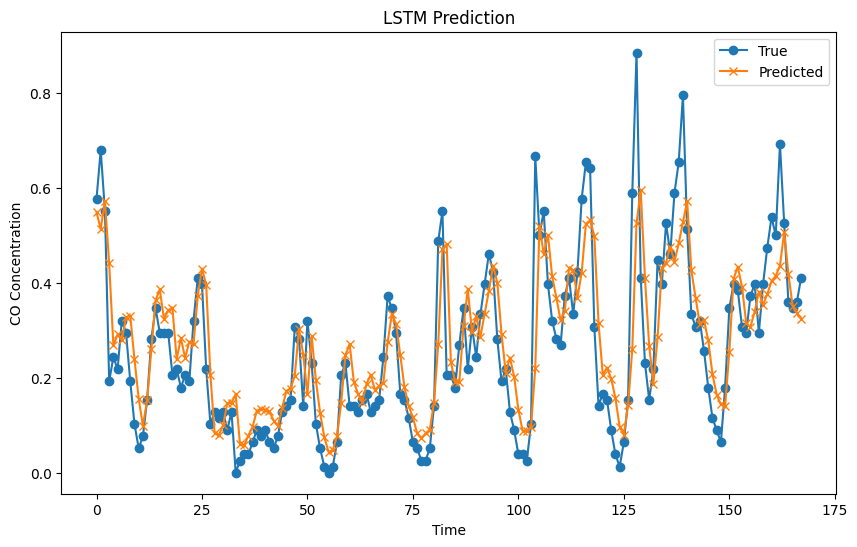

In [259]:
# plot the prediction
import matplotlib.pyplot as plt


def plot_prediction(
    y_true, y_pred, title="Prediction", x_label="Time", y_label="Value"
):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="True", marker="o")
    plt.plot(y_pred, label="Predicted", marker="x")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


# Predictions
predictions = []
for i in range(len(x_test_seq)):
    h_t = np.zeros((model.hidden_size, 1))
    c_t = np.zeros((model.hidden_size, 1))

    # Forward pass through time steps
    for t in range(len(x_test_seq[i])):
        x_t = x_test_seq[i][t].reshape(-1, 1)
        h_t, c_t, _ = model.forward(x_t, h_t, c_t)

    predictions.append(h_t[0, 0])

plot_prediction(
    y_test_seq,
    predictions,
    title="LSTM Prediction",
    x_label="Time",
    y_label="CO Concentration",
)

In [267]:
def GRU(x_t, h_prev, W_z, b_z, W_r, b_r, W_h, b_h):
    """
    GRU forward pass implementation
    x_t: input at current timestamp
    h_prev: previous hidden state
    W_z, b_z: update gate parameters
    W_r, b_r: reset gate parameters
    W_h, b_h: candidate hidden state parameters
    """
    # Ensure x_t has the correct shape
    if x_t.ndim == 1:
        x_t = x_t[:, None]

    # Concatenate input and previous hidden state
    concat_h_x = np.vstack((h_prev, x_t))

    # Update gate
    z_t = sigmoid(np.dot(W_z, concat_h_x) + b_z)

    # Reset gate
    r_t = sigmoid(np.dot(W_r, concat_h_x) + b_r)

    # Candidate hidden state
    concat_rh_x = np.vstack((r_t * h_prev, x_t))
    h_tilde = tanh(np.dot(W_h, concat_rh_x) + b_h)

    # New hidden state
    h_t = (1 - z_t) * h_prev + z_t * h_tilde

    return h_t, z_t, r_t, h_tilde

In [268]:
# test
input_dim = 4
hidden_dim = 3

# Fake input
np.random.seed(42)
x_t = np.random.randn(input_dim, 1)
h_prev = np.random.randn(hidden_dim, 1)

print("Input x_t:")
print(x_t)
print("Hidden state h_prev:")
print(h_prev)

Input x_t:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]
Hidden state h_prev:
[[-0.23415337]
 [-0.23413696]
 [ 1.57921282]]


In [270]:
# Initialize weights and biases
def initialize_weights(input_size, hidden_size):
    np.random.seed(42)
    W_z = np.random.randn(hidden_size, hidden_size + input_size)
    b_z = np.zeros((hidden_size, 1))
    W_r = np.random.randn(hidden_size, hidden_size + input_size)
    b_r = np.zeros((hidden_size, 1))
    W_h = np.random.randn(hidden_size, hidden_size + input_size)
    b_h = np.zeros((hidden_size, 1))
    return W_z, b_z, W_r, b_r, W_h, b_h


W_z, b_z, W_r, b_r, W_h, b_h = initialize_weights(input_dim, hidden_dim)

print("Update gate weights W_z:")
print(W_z)
print("Update gate bias b_z:")
print(b_z)
print("Reset gate weights W_r:")
print(W_r)
print("Reset gate bias b_r:")
print(b_r)
print("Candidate hidden state weights W_h:")
print(W_h)
print("Candidate hidden state bias b_h:")
print(b_h)

Update gate weights W_z:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282]
 [ 0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227
  -1.91328024]
 [-1.72491783 -0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037
   1.46564877]]
Update gate bias b_z:
[[0.]
 [0.]
 [0.]]
Reset gate weights W_r:
[[-0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259 -1.15099358
   0.37569802]
 [-0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093
   0.82254491]
 [-1.22084365  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658
   0.17136828]]
Reset gate bias b_r:
[[0.]
 [0.]
 [0.]]
Candidate hidden state weights W_h:
[[-0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
   0.34361829]
 [-1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629  1.03099952
   0.93128012]
 [-0.83921752 -0.30921238  0.33126343  0.97554513 -0.47917424 -0.18565898
  -1.10633497]]
Candidate hidden state bias b_h

In [271]:
# forward
h_t, z_t, r_t, h_tilde = GRU(x_t, h_prev, W_z, b_z, W_r, b_r, W_h, b_h)

print("New hidden state h_t:")
print(h_t)
print("Update gate z_t:")
print(z_t)
print("Reset gate r_t:")
print(r_t)
print("Candidate hidden state h_tilde:")
print(h_tilde)

New hidden state h_t:
[[ 0.6640389 ]
 [-0.11193969]
 [ 0.06482372]]
Update gate z_t:
[[0.98168103]
 [0.10564509]
 [0.63069606]]
Reset gate r_t:
[[0.06464893]
 [0.67881411]
 [0.05703164]]
Candidate hidden state h_tilde:
[[ 0.68079989]
 [ 0.92254021]
 [-0.8219265 ]]


In [1]:
# Reuse the LSTMCell class
class GRUCell:
    def __init__(self, input_size: int, hidden_size: int):
        """Initialize GRU cell parameters"""
        self.hidden_size = hidden_size
        self.input_size = input_size

        # Xavier/Glorot initialization
        scale = np.sqrt(2.0 / (input_size + hidden_size))

        # Initialize weights
        self.W_z = np.random.randn(hidden_size, hidden_size + input_size) * scale
        self.W_r = np.random.randn(hidden_size, hidden_size + input_size) * scale
        self.W_h = np.random.randn(hidden_size, hidden_size + input_size) * scale

        # Initialize biases
        self.b_z = np.zeros((hidden_size, 1))
        self.b_r = np.zeros((hidden_size, 1))
        self.b_h = np.zeros((hidden_size, 1))

    def forward(self, x_t: np.ndarray, h_prev: np.ndarray) -> Tuple[np.ndarray, dict]:
        """Forward pass"""
        self.x_t = x_t
        self.h_prev = h_prev

        # Run GRU forward pass
        self.h_t, self.z_t, self.r_t, self.h_tilde = GRU(
            x_t, h_prev, self.W_z, self.b_z, self.W_r, self.b_r, self.W_h, self.b_h
        )

        # Store values for backpropagation
        cache = {
            "x_t": x_t,
            "h_prev": h_prev,
            "z_t": self.z_t,
            "r_t": self.r_t,
            "h_tilde": self.h_tilde,
        }

        return self.h_t, cache

    def backward(
        self, dh_t: np.ndarray, cache: dict, learning_rate: float = 0.01
    ) -> np.ndarray:
        """Backward pass"""
        x_t = cache["x_t"]
        h_prev = cache["h_prev"]
        z_t = cache["z_t"]
        r_t = cache["r_t"]
        h_tilde = cache["h_tilde"]

        # Concatenated inputs
        concat_h_x = np.vstack((h_prev, x_t))
        concat_rh_x = np.vstack((r_t * h_prev, x_t))

        # Gradients for update gate
        dz = dh_t * (h_tilde - h_prev)
        dWz = np.dot(dz * z_t * (1 - z_t), concat_h_x.T)
        dbz = np.sum(dz * z_t * (1 - z_t), axis=1, keepdims=True)

        # Gradients for reset gate
        dh_tilde = dh_t * z_t
        dr = (
            np.dot(self.W_h[:, : self.hidden_size].T, dh_tilde * (1 - h_tilde**2))
            * h_prev
        )
        dWr = np.dot(dr * r_t * (1 - r_t), concat_h_x.T)
        dbr = np.sum(dr * r_t * (1 - r_t), axis=1, keepdims=True)

        # Gradients for candidate hidden state
        dWh = np.dot(dh_tilde * (1 - h_tilde**2), concat_rh_x.T)
        dbh = np.sum(dh_tilde * (1 - h_tilde**2), axis=1, keepdims=True)

        # Update weights and biases
        self.W_z -= learning_rate * dWz
        self.W_r -= learning_rate * dWr
        self.W_h -= learning_rate * dWh
        self.b_z -= learning_rate * dbz
        self.b_r -= learning_rate * dbr
        self.b_h -= learning_rate * dbh

        # Gradient for previous hidden state
        dh_prev = dh_t * (1 - z_t)
        dh_prev += np.dot(self.W_z[:, : self.hidden_size].T, dz * z_t * (1 - z_t))
        dh_prev += np.dot(self.W_r[:, : self.hidden_size].T, dr * r_t * (1 - r_t))
        dh_prev += r_t * np.dot(
            self.W_h[:, : self.hidden_size].T, dh_tilde * (1 - h_tilde**2)
        )

        return dh_prev

NameError: name 'np' is not defined

In [273]:
def train_gru(
    model: GRUCell,
    x_train_seq: np.ndarray,
    y_train_seq: np.ndarray,
    epochs: int,
    learning_rate: float,
) -> List[float]:
    """Train the GRU model"""
    losses = []
    n_sequences = len(x_train_seq)

    for epoch in range(epochs):
        epoch_loss = 0

        for i in range(n_sequences):
            # Initialize hidden state
            h_t = np.zeros((model.hidden_size, 1))
            sequence_loss = 0
            caches = []

            # Forward pass through time steps
            for t in range(len(x_train_seq[i])):
                x_t = x_train_seq[i][t].reshape(-1, 1)
                h_t, cache = model.forward(x_t, h_t)
                caches.append(cache)

            # Compute loss
            prediction = h_t[0, 0]
            target = y_train_seq[i]
            loss = (prediction - target) ** 2
            sequence_loss += loss

            # Backward pass
            dh_t = np.zeros_like(h_t)
            dh_t[0, 0] = 2 * (prediction - target)

            # Backpropagate through time
            for t in reversed(range(len(x_train_seq[i]))):
                dh_t = model.backward(dh_t, caches[t], learning_rate)

            epoch_loss += sequence_loss

        avg_loss = epoch_loss / n_sequences
        losses.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

    return losses

In [274]:
def evaluate_gru(
    model: GRUCell, x_test_seq: np.ndarray, y_test_seq: np.ndarray
) -> Tuple[float, float, np.ndarray]:
    """Evaluate the GRU model"""
    predictions = []

    for i in range(len(x_test_seq)):
        h_t = np.zeros((model.hidden_size, 1))

        # Forward pass through time steps
        for t in range(len(x_test_seq[i])):
            x_t = x_test_seq[i][t].reshape(-1, 1)
            h_t, _ = model.forward(x_t, h_t)

        predictions.append(h_t[0, 0])

    predictions = np.array(predictions)
    mse = mean_squared_error(y_test_seq, predictions)
    mae = mean_absolute_error(y_test_seq, predictions)

    return mse, mae, predictions

In [275]:
# Initialize model
input_size = x_train_seq.shape[2]  # Number of features
hidden_size = 32  # Number of hidden units
model = GRUCell(input_size, hidden_size)

In [279]:
# Training parameters
epochs = 500
learning_rate = 0.01

In [280]:
losses = train_gru(model, x_train_seq, y_train_seq, epochs, learning_rate)

Epoch 0, Loss: 0.0090
Epoch 10, Loss: 0.0089
Epoch 20, Loss: 0.0089
Epoch 30, Loss: 0.0089
Epoch 40, Loss: 0.0089
Epoch 50, Loss: 0.0089
Epoch 60, Loss: 0.0089
Epoch 70, Loss: 0.0089
Epoch 80, Loss: 0.0089
Epoch 90, Loss: 0.0088
Epoch 100, Loss: 0.0088
Epoch 110, Loss: 0.0088
Epoch 120, Loss: 0.0088
Epoch 130, Loss: 0.0088
Epoch 140, Loss: 0.0088
Epoch 150, Loss: 0.0088
Epoch 160, Loss: 0.0088
Epoch 170, Loss: 0.0088
Epoch 180, Loss: 0.0088
Epoch 190, Loss: 0.0088
Epoch 200, Loss: 0.0088
Epoch 210, Loss: 0.0088
Epoch 220, Loss: 0.0088
Epoch 230, Loss: 0.0088
Epoch 240, Loss: 0.0088
Epoch 250, Loss: 0.0088
Epoch 260, Loss: 0.0088
Epoch 270, Loss: 0.0087
Epoch 280, Loss: 0.0087
Epoch 290, Loss: 0.0087
Epoch 300, Loss: 0.0087
Epoch 310, Loss: 0.0087
Epoch 320, Loss: 0.0087
Epoch 330, Loss: 0.0087
Epoch 340, Loss: 0.0087
Epoch 350, Loss: 0.0087
Epoch 360, Loss: 0.0087
Epoch 370, Loss: 0.0087
Epoch 380, Loss: 0.0087
Epoch 390, Loss: 0.0087
Epoch 400, Loss: 0.0086
Epoch 410, Loss: 0.0086
Epo

In [281]:
mse, mae, predictions = evaluate_gru(model, x_test_seq, y_test_seq)
print(f"\nTest Results:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


Test Results:
MSE: 0.0105
MAE: 0.0834


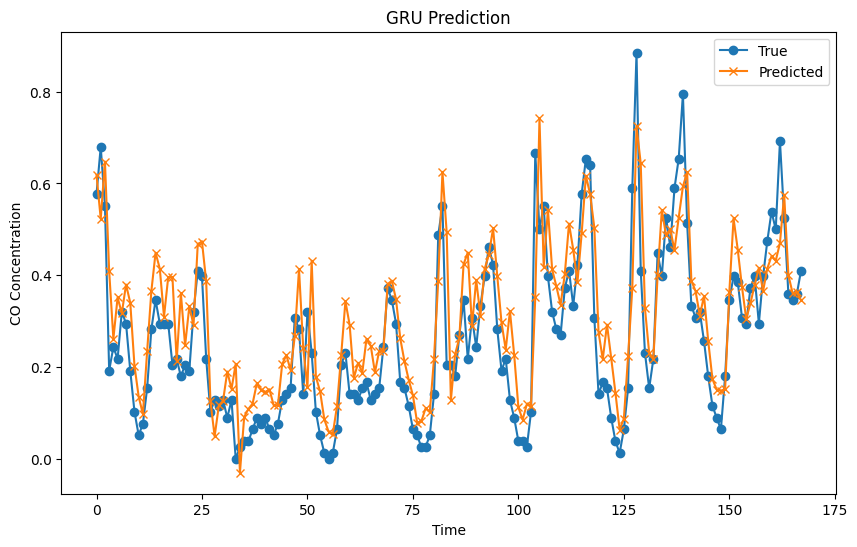

In [282]:
plot_prediction(
    y_test_seq,
    predictions,
    title="GRU Prediction",
    x_label="Time",
    y_label="CO Concentration",
)